# Second Model: Artificial Neural Network (ANN)

## Fetch Processed Data

In [1]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

Cloning into 'amazon_sales_prediction'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 87 (delta 29), reused 52 (delta 8), pack-reused 0
Receiving objects: 100% (87/87), 8.79 MiB | 12.17 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('amazon_sales_prediction/data.csv')
data.head()

,sub_category,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,0,4.1,2092.0,4.590915,7.205687,36.287625,8577.2
1,1,4.4,7943.0,132.534040,240.872394,44.977489,34949.2
2,0,3.8,229.0,2.482227,12.049645,79.400000,870.2
3,0,3.7,33.0,2.156886,18.062417,88.058706,122.1
4,2,3.6,37.0,0.409688,0.590433,30.612245,133.2


## Artificial Neural Network

In [14]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

y = data['ratings']
X = data.drop('ratings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train

(2500, 6)
(278, 6)
(2500,)
(278,)


,sub_category,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
1641,0,250.0,3.241354,24.087239,86.543272,925.0
2767,1,2809.0,337.269551,638.510664,47.178713,11797.8
324,0,318.0,4.205326,21.641162,80.567929,1367.4
2132,0,3020.0,4.181227,4.639113,9.870130,13288.0
1058,0,1797.0,5.289794,6.615255,20.036430,7008.3
...,...,...,...,...,...,...
1638,0,2984.0,6.012773,15.652488,61.585835,11339.2
1095,0,229.0,14.604169,32.473792,55.027829,984.7
1130,0,1383.0,14.580070,36.136884,59.653218,5808.6
1294,0,10.0,2.397879,6.012773,60.120240,30.0


### Hyper Parameter Tuning

In [5]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [6]:
import keras
from keras import layers
import keras_tuner

In [7]:



def build_model(hp):

  model = Sequential()

  model.add(Dense(units=hp.Int("num of node in input later", min_value=32, max_value=128, step=32), input_dim=X_train.shape[1], activation='relu'))

  for i in range(3):
    model.add(
        layers.Dense(
          # Tune number of units separately.
          units=hp.Int(f"num of node for layer", min_value=16, max_value=64, step=8),
          activation=hp.Choice("activation", ["relu", "tanh", "linear"]),
        )
    )

  model.add(Dense(1, activation='linear'))


  loss_choice = hp.Choice('loss', ['mse', 'mae'])  # Loss function choice
  model.compile(loss=loss_choice, metrics=['mean_absolute_error', 'mean_squared_error'])

  return model

In [8]:

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_mean_squared_error",
    max_trials=50,
    executions_per_trial=1,
    overwrite=True,
    directory="Tuner",
    project_name="hyperparameter tuning epochs = 100",
)

In [9]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num of node in input later (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
num of node for layer (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 8, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'linear'], 'ordered': False}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'mae'], 'ordered': False}


In [10]:
tuner.search(X_train, y_train, epochs=100,  batch_size=4, validation_split=0.1)

Trial 50 Complete [00h 03m 23s]
val_mean_squared_error: 0.20856979489326477

Best val_mean_squared_error So Far: 0.02904459834098816
Total elapsed time: 02h 35m 14s


In [11]:
tuner.results_summary()

Results summary
Results in Tuner/hyperparameter tuning epochs = 100
Showing 10 best trials
Objective(name="val_mean_squared_error", direction="min")

Trial 32 summary
Hyperparameters:
num of node in input later: 32
num of node for layer: 48
activation: tanh
loss: mse
Score: 0.02904459834098816

Trial 05 summary
Hyperparameters:
num of node in input later: 96
num of node for layer: 48
activation: tanh
loss: mse
Score: 0.034232594072818756

Trial 43 summary
Hyperparameters:
num of node in input later: 64
num of node for layer: 40
activation: tanh
loss: mse
Score: 0.03453993424773216

Trial 09 summary
Hyperparameters:
num of node in input later: 64
num of node for layer: 32
activation: tanh
loss: mse
Score: 0.03588880971074104

Trial 11 summary
Hyperparameters:
num of node in input later: 128
num of node for layer: 40
activation: tanh
loss: mse
Score: 0.04228980466723442

Trial 06 summary
Hyperparameters:
num of node in input later: 32
num of node for layer: 16
activation: tanh
loss: mse


In [15]:
from sklearn.metrics import mean_squared_error

In [18]:
best_model = Sequential()
best_model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
best_model.add(Dense(units=48, activation="tanh"))
best_model.add(Dense(units=48, activation="tanh"))
best_model.add(Dense(units=48, activation="tanh"))
best_model.add(Dense(1, activation='linear'))
best_model.compile(loss='mse', metrics=['mean_absolute_error', 'mean_squared_error'])

In [20]:
history = best_model.fit(X_train, y_train, batch_size = 4, epochs = 100, verbose = 1, validation_split=0.1)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 0.4126 - mean_absolute_error: 0.3998 - mean_squared_error: 0.4126 - val_loss: 0.2503 - val_mean_absolute_error: 0.3413 - val_mean_squared_error: 0.2503
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2414 - mean_absolute_error: 0.3416 - mean_squared_error: 0.2414 - val_loss: 0.2890 - val_mean_absolute_error: 0.3693 - val_mean_squared_error: 0.2890
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2334 - mean_absolute_error: 0.3357 - mean_squared_error: 0.2334 - val_loss: 0.2865 - val_mean_absolute_error: 0.3596 - val_mean_squared_error: 0.2865
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.2278 - mean_absolute_error: 0.3325 - mean_squared_error: 0.2278 - val_loss: 0.2550 - val_mean_absolute_error: 0.3443 - val_mean_squared_error: 0.2550
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 0.2166 - mean_abs

In [21]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Testing MSE for Hyperparameter tuned ANN: {mse}')

9/9 [==============================] - 0s 2ms/step
Testing MSE for Hyperparameter tuned ANN: 0.05138507687710006


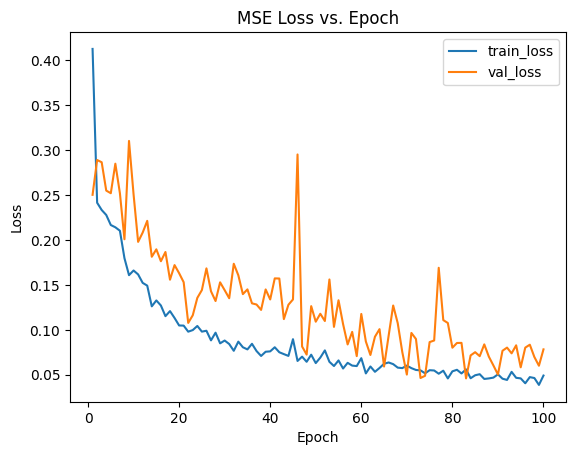

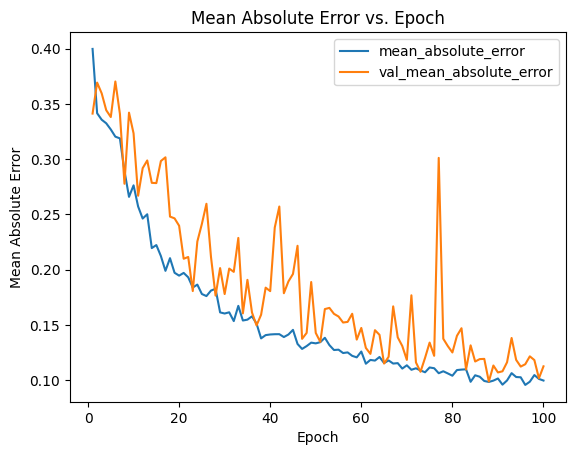

In [22]:
epoch = np.arange(1, len(history.history['loss']) + 1)

plt.plot(epoch, history.history['loss'], label='train_loss')
plt.plot(epoch, history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Epoch')
plt.show()

plt.plot(epoch, history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(epoch, history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Mean Absolute Error vs. Epoch')
plt.show()